In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bootstrap, mannwhitneyu
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv('Product Analyst Test Task Data - Task 1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15285 entries, 0 to 15284
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            15285 non-null  object 
 1   install_date       15285 non-null  object 
 2   country            15285 non-null  object 
 3   test_group         15285 non-null  object 
 4   trial              15285 non-null  int64  
 5   paid               15285 non-null  int64  
 6   subscription_name  1723 non-null   object 
 7   revenue_1m         15285 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 955.4+ KB


In [4]:
# Отримання даних для Control та Treatment груп
control_group = data[data['test_group'] == 'control']
treatment_group = data[data['test_group'] == 'treatment']
# Підрахунок кількості користувачів у кожній групі
users_in_control_group = control_group['user_id'].nunique()
users_in_treatment_group = treatment_group['user_id'].nunique()

print("Кількість користувачів у control групі:", users_in_control_group)
print("Кількість користувачів у treatment групі:", users_in_treatment_group)


Кількість користувачів у control групі: 7627
Кількість користувачів у treatment групі: 7658


In [5]:
control_group

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
3,000d1a300263c5db91cbefa3852898a7,2023-06-07,AU,control,0,0,NaN,0.0
6,000eb23cf1caf152d9b8d4ec2441e085,2023-06-02,AU,control,0,0,NaN,0.0
9,002066ee39aacf3dbe4294be1a08bd77,2023-06-06,GB,control,0,0,NaN,0.0
14,00325ed2425735d08aa2ab3a7347166f,2023-06-06,CA,control,0,0,NaN,0.0
15,0032f6e3d890cc6956761fbb511c57ec,2023-06-06,US,control,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...
15275,ffe1ccb76df3db8569789f92cf232266,2023-06-04,AU,control,0,0,NaN,0.0
15277,ffe865c62a5f4f989d794d9bfeedc310,2023-06-07,GB,control,0,0,NaN,0.0
15278,ffee18d8bcc35d0b9499105b103388cc,2023-06-03,AU,control,0,0,NaN,0.0
15280,ffeef2252b1e6f9084eb9eefdb72461b,2023-06-04,AU,control,1,0,monthly.5.99.3d.trial,0.0


In [6]:
treatment_group

,user_id,install_date,country,test_group,trial,paid,subscription_name,revenue_1m
0,0000dd3fa4702a63d1b76aaffe1ab39b,2023-06-05,US,treatment,0,0,NaN,0.0
1,0001f27ab7e22228e54c8b2028b43f24,2023-06-07,AU,treatment,0,0,NaN,0.0
2,0006c5c547801308b36ea3cf669856ae,2023-06-07,AU,treatment,0,0,NaN,0.0
4,000e5e62e8746e467ed9f49ac5de3208,2023-06-06,US,treatment,0,0,NaN,0.0
5,000e65027879059fe2a814be4ff21316,2023-06-04,CA,treatment,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...
15276,ffe7e1e51704048b7f769e9f733ec3f9,2023-06-01,AU,treatment,0,0,NaN,0.0
15279,ffee60dc3eb6e26ce65886e1bdd7389c,2023-06-04,AU,treatment,0,0,NaN,0.0
15281,ffef2243e364f6d53cf5bee90473a4d7,2023-06-06,CA,treatment,0,0,NaN,0.0
15282,fff046eac6fd5329dd1fe44ad5e162cb,2023-06-07,US,treatment,0,0,NaN,0.0


In [7]:
# Розрахунок показників
conversion_control = control_group["trial"].sum() / len(control_group)
conversion_treatment = treatment_group["trial"].sum() / len(treatment_group)
revenue_control = control_group["revenue_1m"].sum()
revenue_treatment = treatment_group["revenue_1m"].sum()
arpu_control = revenue_control / len(control_group)
arpu_treatment = revenue_treatment / len(treatment_group)
data_trial = data[data["trial"] == True]

<Axes: xlabel='test_group', ylabel='trial'>

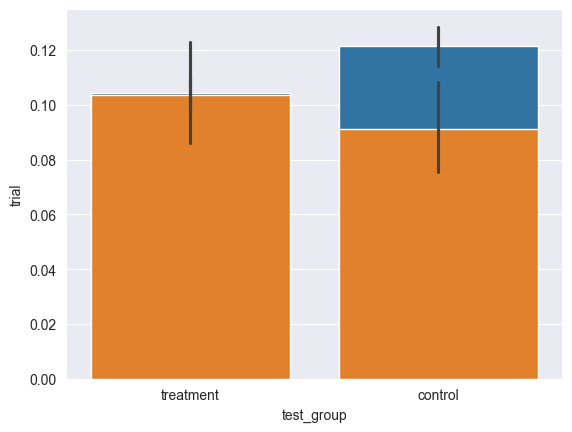

In [35]:
# Порівняння груп
t_test_conversion = stats.ttest_ind(control_group["trial"], treatment_group["trial"])
t_test_revenue = stats.ttest_ind(control_group["revenue_1m"], treatment_group["revenue_1m"])
# Розрахунок t-статистики
t_statistic, p_value = stats.ttest_ind(data_trial["revenue_1m"], data["revenue_1m"])
# Візуалізація даних
sns.barplot(x="test_group", y="trial", data=data)
sns.barplot(x="test_group", y="revenue_1m", data=data)

In [9]:
print("Конверсія:")
print("Control:", conversion_control)
print("Treatment:", conversion_treatment)
print("p-value:", t_test_conversion.pvalue)

print("Ревеню:")
print("Control:", revenue_control)
print("Treatment:", revenue_treatment)
print("p-value:", t_test_revenue.pvalue)
#різниці нема
print("ARPU:")
print("Control:", arpu_control)
print("Treatment:", arpu_treatment)
print("p-value:", p_value)

Конверсія:
Control: 0.12127966435033434
Treatment: 0.10420475319926874
p-value: 0.0008443391141627945
Ревеню:
Control: 694.84
Treatment: 792.35
p-value: 0.32860537385991484
ARPU:
Control: 0.09110266159695818
Treatment: 0.10346696265343432
p-value: 2.1521708378881842e-188


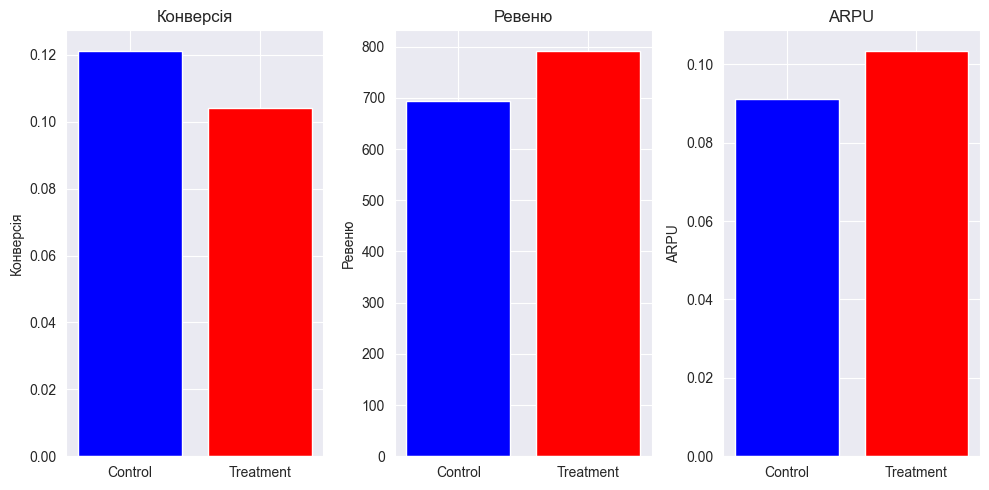

In [10]:
# Дані для графіка
categories = ['Control', 'Treatment']
conversion_data = [conversion_control, conversion_treatment]
revenue_data = [revenue_control, revenue_treatment]
arpu_data = [arpu_control, arpu_treatment]

# Графік конверсії
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(categories, conversion_data, color=['blue', 'red'])
plt.title('Конверсія')
plt.ylabel('Конверсія')

# Графік доходу
plt.subplot(1, 3, 2)
plt.bar(categories, revenue_data, color=['blue', 'red'])
plt.title('Ревеню')
plt.ylabel('Ревеню')

# Графік ARPU
plt.subplot(1, 3, 3)
plt.bar(categories, arpu_data, color=['blue', 'red'])
plt.title('ARPU')
plt.ylabel('ARPU')

plt.tight_layout()
plt.show()

In [11]:
# Визначимо функцію для проведення bootstrap
def bootstrap(data, num_samples=1000):
    sample_statistics = []
    for _ in range(num_samples):
        # Випадковим чином вибираємо заміщенням підвибірку з даних
        sample = np.random.choice(data, size=len(data), replace=True)
        # Обчислюємо потрібну статистику (наприклад, середнє)
        statistic = np.mean(sample)  # Змініть це залежно від вашої потреби
        sample_statistics.append(statistic)
    return sample_statistics

In [12]:
# Проведемо bootstrap для контрольної та тестової груп
control_bootstrap = bootstrap(control_group['revenue_1m'])
treatment_bootstrap = bootstrap(treatment_group['revenue_1m'])
control_ci = np.percentile(control_bootstrap, [2.5, 97.5])
treatment_ci = np.percentile(treatment_bootstrap, [2.5, 97.5])
# Обчислимо p-value
p_value = np.mean(control_bootstrap >= np.mean(treatment_bootstrap))

In [39]:
print("95% довірчий інтервал для доходу контрольної групи", control_ci)
print("95% довірчий інтервал для доходу тестової групи", treatment_ci)
print("p-value:", p_value)

95% довірчий інтервал для доходу контрольної групи [0.07460994 0.10759538]
95% довірчий інтервал для доходу тестової групи [0.08433534 0.12337947]
p-value: 2.1521708378881842e-188


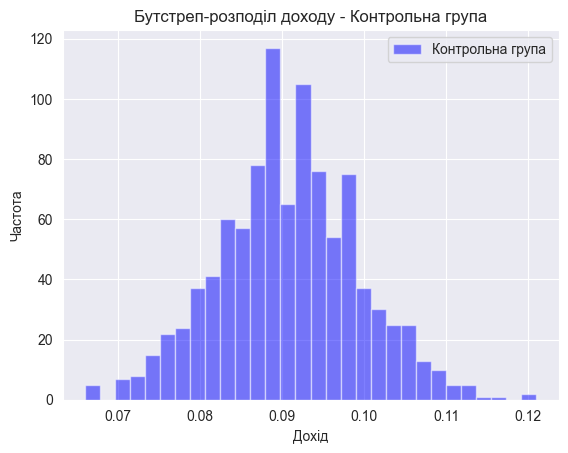

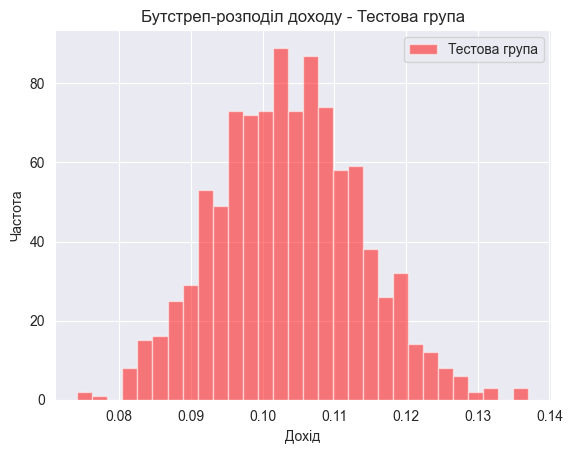

In [14]:
import matplotlib.pyplot as plt

# Побудова гістограми для контрольної групи
plt.hist(control_bootstrap, bins=30, alpha=0.5, color='blue', label='Контрольна група')

# Додавання підписів до графіку
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.title('Бутстреп-розподіл доходу - Контрольна група')
plt.legend()

# Відображення графіку
plt.show()

# Побудова гістограми для тестової групи
plt.hist(treatment_bootstrap, bins=30, alpha=0.5, color='red', label='Тестова група')

# Додавання підписів до графіку
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.title('Бутстреп-розподіл доходу - Тестова група')
plt.legend()

# Відображення графіку
plt.show()


In [16]:
# Відфільтруємо дані для користувачів, які пройшли пробний період
trial_users = data[data['trial'] == True]

# Розділимо дані для користувачів, які пройшли пробний період, на контрольну та тестову групи
trial_control_group = trial_users[trial_users['test_group'] == 'control']
trial_treatment_group = trial_users[trial_users['test_group'] == 'treatment']

# Розрахунок ARPU для користувачів, які пройшли пробний період, у контрольній групі
trial_control_revenue = trial_control_group['revenue_1m'].sum()
trial_control_users = trial_control_group['user_id'].nunique()
trial_control_arpu = trial_control_revenue / trial_control_users

print("ARPU для користувачів, які пройшли пробний період, у контрольній групі:", trial_control_arpu)

# Розрахунок ARPU для користувачів, які пройшли пробний період, у тестовій групі
trial_treatment_revenue = trial_treatment_group['revenue_1m'].sum()
trial_treatment_users = trial_treatment_group['user_id'].nunique()
trial_treatment_arpu = trial_treatment_revenue / trial_treatment_users

print("ARPU для користувачів, які пройшли пробний період, у тестовій групі:", trial_treatment_arpu)

# Розрахунок різниці між ARPU для користувачів, які пройшли пробний період, у контрольній та тестовій групі
observed_difference_arpu_trial = trial_treatment_arpu - trial_control_arpu

# Розрахунок p-value для різниці в ARPU для користувачів, які пройшли пробний період, за допомогою t-тесту
t_statistic_arpu_trial, p_value_arpu_trial = ttest_ind(trial_control_group['revenue_1m'], trial_treatment_group['revenue_1m'])

print("t-статистика для ARPU користувачів, які пройшли пробний період:", t_statistic_arpu_trial)
print("p-value для ARPU користувачів, які пройшли пробний період:", p_value_arpu_trial)


ARPU для користувачів, які пройшли пробний період, у контрольній групі: 0.7511783783783784
ARPU для користувачів, які пройшли пробний період, у тестовій групі: 0.9929197994987469
t-статистика для ARPU користувачів, які пройшли пробний період: -2.2935710264498437
p-value для ARPU користувачів, які пройшли пробний період: 0.02193517860447607


In [40]:

# Розділення даних на групи за країною
country_groups = {}

for country_code in ['AU', 'US', 'CA', 'GB']:
    country_data = data[data['country'] == country_code]
    country_groups[country_code] = country_data

# Розрахунок ARPU та t-тест для кожної країни окремо
for country_code, country_data in country_groups.items():
    country_control_group = country_data[country_data['test_group'] == 'control']
    country_treatment_group = country_data[country_data['test_group'] == 'treatment']
    
    # Розрахунок ARPU
    country_control_revenue = country_control_group['revenue_1m'].sum()
    country_control_users = country_control_group['user_id'].nunique()
    country_control_arpu = country_control_revenue / country_control_users
    
    country_treatment_revenue = country_treatment_group['revenue_1m'].sum()
    country_treatment_users = country_treatment_group['user_id'].nunique()
    country_treatment_arpu = country_treatment_revenue / country_treatment_users
    
    print("ARPU для користувачів, які пройшли пробний період, в ", country_code, "в контрольній групі:", country_control_arpu)
    print("ARPU для користувачів, які пройшли пробний період, в ", country_code, "в тестовій:", country_treatment_arpu)


ARPU for trial users in AU control group: 0.09320539419087137
ARPU for trial users in AU treatment group: 0.1140599455040872
ARPU for trial users in US control group: 0.10311424100156495
ARPU for trial users in US treatment group: 0.0941857981847304
ARPU for trial users in CA control group: 0.05569214876033057
ARPU for trial users in CA treatment group: 0.09462991322103113
ARPU for trial users in GB control group: 0.11356988082340194
ARPU for trial users in GB treatment group: 0.11113008538422905


In [41]:
# код для розрахунку конверсії та ревеню для кожної країни окремо
# Розділити дані на групи за країною
country_groups_control = {}
country_groups_treatment = {}

for country_code in ['AU', 'US', 'CA', 'GB']:
    country_groups_control[country_code] = control_group[control_group['country'] == country_code]
    country_groups_treatment[country_code] = treatment_group[treatment_group['country'] == country_code]

# Обчислити конверсію та ревеню для кожної країни
for country_code in country_groups_control.keys():
    control_country = country_groups_control[country_code]
    treatment_country = country_groups_treatment[country_code]
    
    # Конверсія
    conversion_control = control_country["trial"].sum() / len(control_country) if len(control_country) > 0 else 0
    conversion_treatment = treatment_country["trial"].sum() / len(treatment_country) if len(treatment_country) > 0 else 0
    
    # Ревеню
    revenue_control = control_country["revenue_1m"].sum()
    revenue_treatment = treatment_country["revenue_1m"].sum()
    
    print("Країна", country_code)
    print("Конверсія в контрольній групі", conversion_control)
    print("Конверсія в тестовій групі", conversion_treatment)
    print("Ревеню в контрольній групі", revenue_control)
    print("Ревеню в тестовій групі", revenue_treatment)


Країна AU
Конверсія в контрольній групі 0.11825726141078838
Конверсія в тестовій групі 0.10408719346049046
Ревеню в контрольній групі 179.70000000000002
Ревеню в тестовій групі 209.3
Країна US
Конверсія в контрольній групі 0.10850286906624934
Конверсія в тестовій групі 0.10144153764014949
Ревеню в контрольній групі 197.67000000000002
Ревеню в тестовій групі 176.41000000000003
Країна CA
Конверсія в контрольній групі 0.1131198347107438
Конверсія в тестовій групі 0.10617662072485962
Ревеню в контрольній групі 107.82
Ревеню в тестовій групі 185.38
Країна GB
Конверсія в контрольній групі 0.14626218851570963
Конверсія в тестовій групі 0.10497237569060773
Ревеню в контрольній групі 209.64999999999998
Ревеню в тестовій групі 221.26000000000005


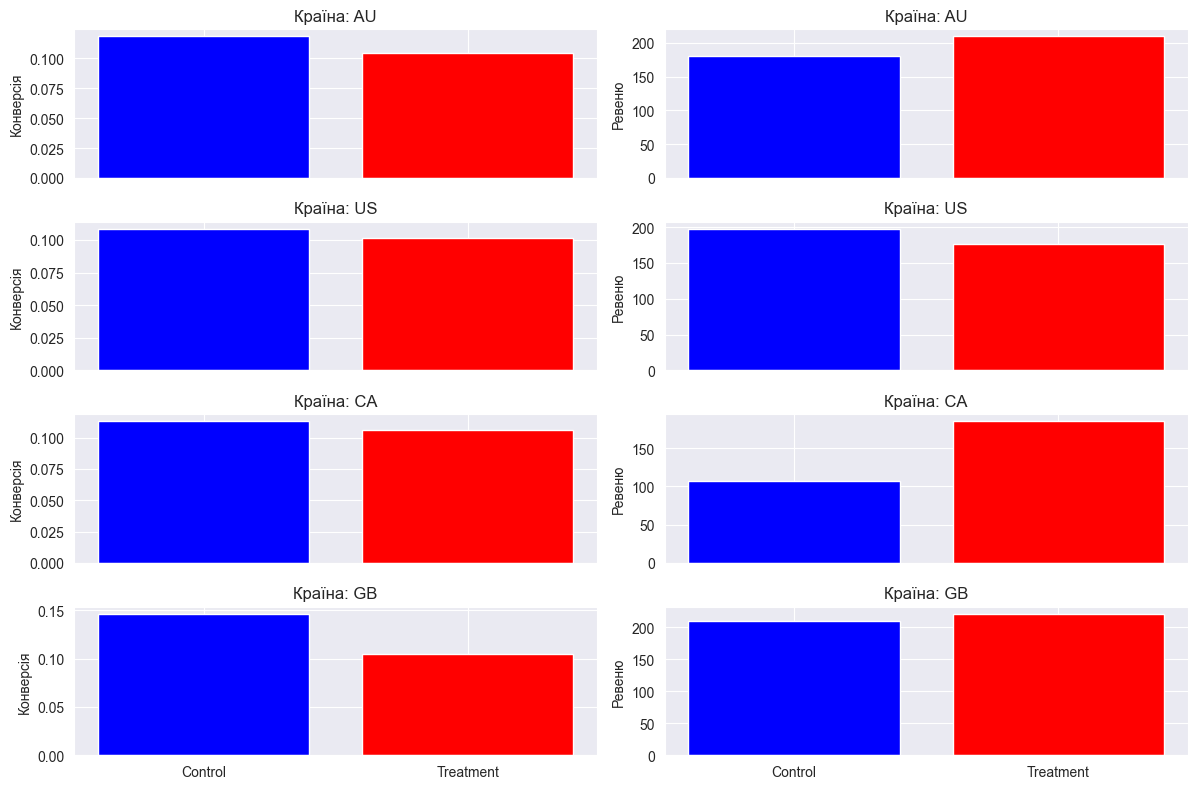

In [19]:
import matplotlib.pyplot as plt

# Список країн
countries = ['AU', 'US', 'CA', 'GB']

# Створення підграфіків
fig, axs = plt.subplots(len(countries), 2, figsize=(12, 8), sharex=True)

# Побудова графіків для кожної країни
for i, country_code in enumerate(countries):
    control_country = country_groups_control[country_code]
    treatment_country = country_groups_treatment[country_code]

    # Конверсія
    conversion_control = control_country["trial"].sum() / len(control_country) if len(control_country) > 0 else 0
    conversion_treatment = treatment_country["trial"].sum() / len(treatment_country) if len(treatment_country) > 0 else 0
    
    # Ревеню
    revenue_control = control_country["revenue_1m"].sum()
    revenue_treatment = treatment_country["revenue_1m"].sum()
    
    # Побудова стовпчикової діаграми конверсії
    axs[i, 0].bar(['Control', 'Treatment'], [conversion_control, conversion_treatment], color=['blue', 'red'])
    axs[i, 0].set_ylabel('Конверсія')
    axs[i, 0].set_title(f'Країна: {country_code}')
    
    # Побудова стовпчикової діаграми ревеню
    axs[i, 1].bar(['Control', 'Treatment'], [revenue_control, revenue_treatment], color=['blue', 'red'])
    axs[i, 1].set_ylabel('Ревеню')
    axs[i, 1].set_title(f'Країна: {country_code}')

# Відображення графіків
plt.tight_layout()
plt.show()


In [20]:
# Підрахунок кількості користувачів, які здійснили оплату після пробного періоду
paid_users_control = control_group[control_group['paid'] == 1]['user_id'].nunique()
paid_users_treatment = treatment_group[treatment_group['paid'] == 1]['user_id'].nunique()

# Кількість користувачів у кожній групі
total_users_control = control_group['user_id'].nunique()
total_users_treatment = treatment_group['user_id'].nunique()

# Розрахунок конверсії з пробного періоду в оплату для кожної групи
conversion_control = paid_users_control / total_users_control if total_users_control != 0 else 0
conversion_treatment = paid_users_treatment / total_users_treatment if total_users_treatment != 0 else 0

print("Конверсія з пробного періоду в оплату для control групи:", conversion_control)
print("Конверсія з пробного періоду в оплату для treatment групи:", conversion_treatment)


Конверсія з пробного періоду в оплату для control групи: 0.015209125475285171
Конверсія з пробного періоду в оплату для treatment групи: 0.019456777226429876


In [21]:
# Обчислення середнього доходу від користувача для кожної групи
average_revenue_control = control_group['revenue_1m'].mean()
average_revenue_treatment = treatment_group['revenue_1m'].mean()

print("Середній дохід від користувача в control групі:", average_revenue_control)
print("Середній дохід від користувача в treatment групі:", average_revenue_treatment)


Середній дохід від користувача в control групі: 0.09110266159695818
Середній дохід від користувача в treatment групі: 0.10346696265343432


In [22]:
# Обчислення середньої кількості покупок на користувача для кожної групи
avg_purchases_control = control_group['paid'].mean()
avg_purchases_treatment = treatment_group['paid'].mean()

print("Середня кількість покупок на користувача в control групі:", avg_purchases_control)
print("Середня кількість покупок на користувача в treatment групі:", avg_purchases_treatment)


Середня кількість покупок на користувача в control групі: 0.015209125475285171
Середня кількість покупок на користувача в treatment групі: 0.019456777226429876


In [23]:
#чи є різниця в результатах між різними локаціями Tier-1
from scipy.stats import f_oneway

# Вибірка даних для кожної локації Tier-1
data_AU = data[data['country'] == 'AU']['revenue_1m']
data_US = data[data['country'] == 'US']['revenue_1m']
data_CA = data[data['country'] == 'CA']['revenue_1m']
data_GB = data[data['country'] == 'GB']['revenue_1m']

# Проведення дисперсійного аналізу
f_statistic, p_value = f_oneway(data_AU, data_US, data_CA, data_GB)

print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 1.5792292394471443
p-value: 0.19209100159620568


In [25]:
# Загальний дохід для групи treatment
total_revenue_treatment = treatment_group['revenue_1m'].sum()

# Порахунок кількості разів, 2.99 міститься в загальному доході
times_2_99_in_revenue = total_revenue_treatment / 2.99

print("Кількість разів, які 2.99 міститься в загальному доході для групи treatment:", times_2_99_in_revenue)


Кількість разів, які 2.99 міститься в загальному доході для групи treatment: 265.0


In [26]:
# Фільтрація даних за умовою revenue_1m/2.99 = 4
filtered_data = treatment_group[treatment_group['revenue_1m'] / 2.99 == 4]

# Кількість записів, де revenue_1m/2.99 = 4
total_records = len(filtered_data)

# Групування за країною та підрахунок кількості повторень для кожної країни
country_counts = filtered_data.groupby('country').size().reset_index(name='counts')

print("Загальна кількість записів, де revenue_1m/2.99 = 4:", total_records)
print("Кількість повторень в різних країнах:")
print(country_counts)


Загальна кількість записів, де revenue_1m/2.99 = 4: 9
Кількість повторень в різних країнах:
  country  counts
0      AU       3
1      CA       1
2      GB       2
3      US       3


In [27]:
# Кількість записів у групі control, де paid > 0
paid_control_count = len(control_group[control_group['paid'] > 0])

# Кількість записів у групі treatment, де paid > 0
paid_treatment_count = len(treatment_group[treatment_group['paid'] > 0])

print("Кількість записів у групі control, де paid > 0:", paid_control_count)
print("Кількість записів у групі treatment, де paid > 0:", paid_treatment_count)


Кількість записів у групі control, де paid > 0: 116
Кількість записів у групі treatment, де paid > 0: 149


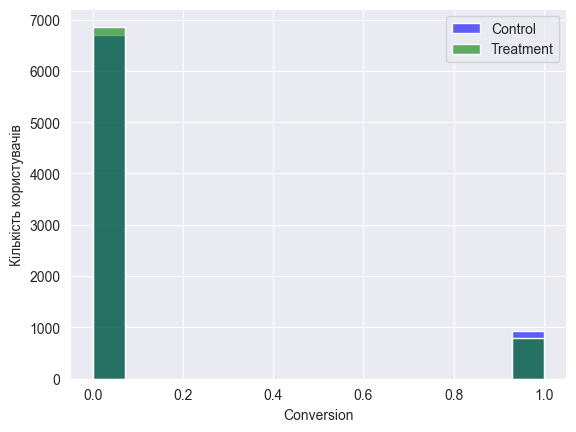

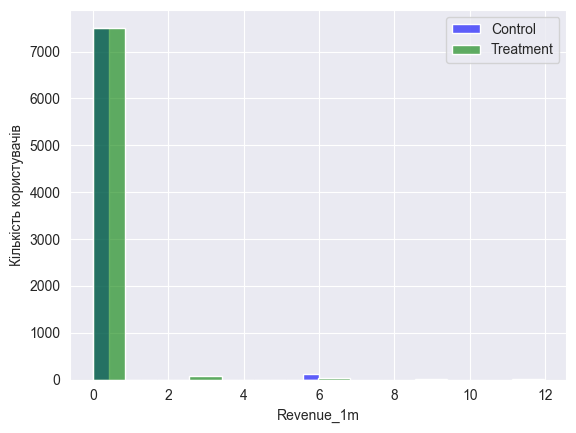

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Створення гістограми для Conversion
sns.histplot(data=control_group, x="trial", color="blue", label="Control", alpha=0.6)
sns.histplot(data=treatment_group, x="trial", color="green", label="Treatment", alpha=0.6)

# Додавання підписів на осі X та Y
plt.xlabel("Conversion")
plt.ylabel("Кількість користувачів")

# Додавання легенди
plt.legend()

# Створення гістограми для Revenue_1m
plt.figure()
sns.histplot(data=control_group, x="revenue_1m", color="blue", label="Control", alpha=0.6)
sns.histplot(data=treatment_group, x="revenue_1m", color="green", label="Treatment", alpha=0.6)

# Додавання підписів на осі X та Y
plt.xlabel("Revenue_1m")
plt.ylabel("Кількість користувачів")

# Додавання легенди
plt.legend()

# Відображення діаграми
plt.show()
